In [167]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing required datasets
#the first datset I will import is the 2022 world happiness report
#Source: https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2022.csv
Happiness_data_22 =pd.read_csv('world_happiness_2022.csv')

# for later I also import the 2021 dataset
# Source: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
Happiness_data_21 =pd.read_csv('world_happiness_2021_1.csv')

#take a look at the first few rows of the 2022 dataset
Happiness_data_22.head()


,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [168]:
#clean the data
shape = Happiness_data_22.shape
print("Number of Rows : {0} Number of Columns : {1}".format(shape[0],shape[1]))
#checking for NA values
Happiness_data_22.isna().any()
#Getting the counts of NA Values
Happiness_data_22.isna().sum() 


Number of Rows : 147 Number of Columns : 12


RANK                            0
Country name                    0
Happiness score                 1
Whisker-high                    1
Whisker-low                     1
Dystopia (1.83) + residual      1
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [172]:
#now we must check which line has the NA info
print(Happiness_data_22.isna())
#line 146 is an empty row so we remove it
Happiness_data_22= Happiness_data_22.drop([146])
Happiness_data_22.isna()

      RANK  Country name  Happiness score  Whisker-high  Whisker-low  \
0    False         False            False         False        False   
1    False         False            False         False        False   
2    False         False            False         False        False   
3    False         False            False         False        False   
4    False         False            False         False        False   
..     ...           ...              ...           ...          ...   
141  False         False            False         False        False   
142  False         False            False         False        False   
143  False         False            False         False        False   
144  False         False            False         False        False   
145  False         False            False         False        False   

     Dystopia (1.83) + residual  GDP per capita  Social support  \
0                         False           False           False   
1

,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
141,False,False,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False


In [173]:
#make a copy of the original file for security reasons
original=Happiness_data_22.copy()

#create a function to show the max record values using colour in each category to be called by style function apply() 
#setting the variable is_max to the max value per category
def show_max(category):    
    is_max = category == category.max()
    return ['background-color: lime' if record else '' for record in is_max]

#retrieve subset of the data to apply the max function on-removing the Country or Region and Overall Ranking
Happiness_data_22.style.apply(show_max, subset=['Happiness score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])


,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [174]:
#create a second function to show the minimum record values in each category
def show_min(category):    
    is_min = category == category.min()
    return ['background-color: red' if record else '' for record in is_min]
Happiness_data_22.style.apply(show_min, subset=['Happiness score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])


,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country name'>

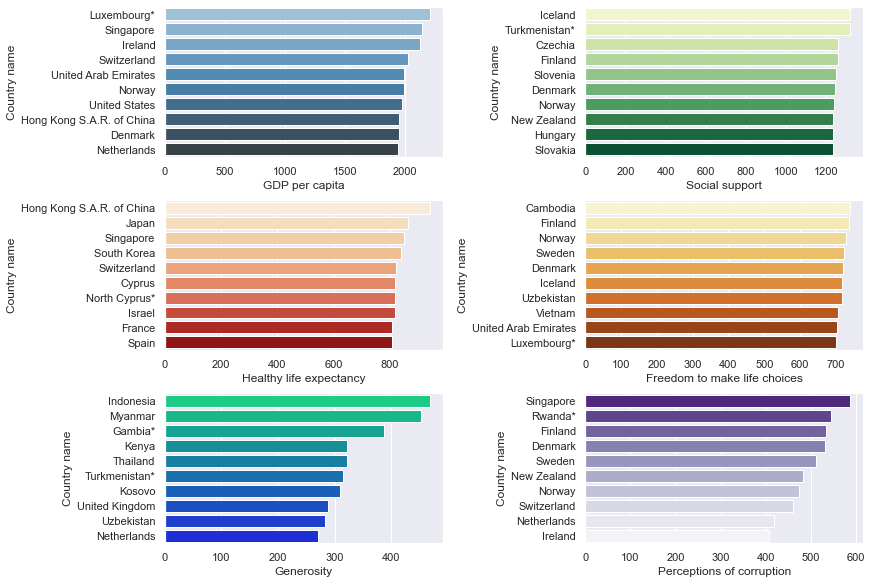

In [181]:
#For each category, display the top 10 countries

#first define how I want my diagrams to be shown 
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

#then per category define what I want to show
#first remove all commas from the data so the functionn nlargest will work
#then change the type of each category from object to int
Happiness_data_22['GDP per capita']= Happiness_data_22['GDP per capita'].str. replace (',','')
Happiness_data_22['GDP per capita'] = Happiness_data_22['GDP per capita'].astype('int')
sns.barplot(x='GDP per capita',y='Country name',data=Happiness_data_22.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

Happiness_data_22['Social support']= Happiness_data_22['Social support'].str. replace (',','')
Happiness_data_22['Social support'] = Happiness_data_22['Social support'].astype('int')
sns.barplot(x='Social support' ,y='Country name',data=Happiness_data_22.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

Happiness_data_22['Healthy life expectancy']= Happiness_data_22['Healthy life expectancy'].str. replace (',','')
Happiness_data_22['Healthy life expectancy'] = Happiness_data_22['Healthy life expectancy'].astype('int')
sns.barplot(x='Healthy life expectancy' ,y='Country name',data=Happiness_data_22.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

Happiness_data_22['Freedom to make life choices']= Happiness_data_22['Freedom to make life choices'].str. replace (',','')
Happiness_data_22['Freedom to make life choices'] = Happiness_data_22['Freedom to make life choices'].astype('int')
sns.barplot(x='Freedom to make life choices' ,y='Country name',data=Happiness_data_22.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

Happiness_data_22['Generosity']= Happiness_data_22['Generosity'].str. replace (',','')
Happiness_data_22['Generosity'] = Happiness_data_22['Generosity'].astype('int')
sns.barplot(x='Generosity' ,y='Country name',data=Happiness_data_22.nlargest(10,'Generosity'),ax=axes[2,0],palette='winter_r')

Happiness_data_22['Perceptions of corruption']= Happiness_data_22['Perceptions of corruption'].str. replace (',','')
Happiness_data_22['Perceptions of corruption'] = Happiness_data_22['Perceptions of corruption'].astype('int')
sns.barplot(x='Perceptions of corruption' ,y='Country name',data=Happiness_data_22.nlargest(10,'Perceptions of corruption'),ax=axes[2,1],palette='Purples_r')

In [182]:
#check the top 10 and bottom 10 countries

#Top 10 Happiest - descending ladder scores by country and score
happiest_top_10 = Happiness_data_22[['Country name','RANK']]
happiest_top_10_list = happiest_top_10.sort_values('RANK', ascending=True)[:10]
print(happiest_top_10_list)

  Country name  RANK
0      Finland     1
1      Denmark     2
2      Iceland     3
3  Switzerland     4
4  Netherlands     5
5  Luxembourg*     6
6       Sweden     7
7       Norway     8
8       Israel     9
9  New Zealand    10


In [183]:
#Top 10 Unhappiest - lowest ascending scores by country and score

unhappiest_top_10 = Happiness_data_22[['Country name','RANK']]
unhappiest_top_10_list = unhappiest_top_10.sort_values('RANK', ascending=False)[:10]
print(unhappiest_top_10_list)

     Country name  RANK
145   Afghanistan   146
144       Lebanon   145
143      Zimbabwe   144
142       Rwanda*   143
141     Botswana*   142
140      Lesotho*   141
139  Sierra Leone   140
138      Tanzania   139
137        Malawi   138
136        Zambia   137


[Text(0.5, 1.0, 'Least Happiest 10 Countries')]

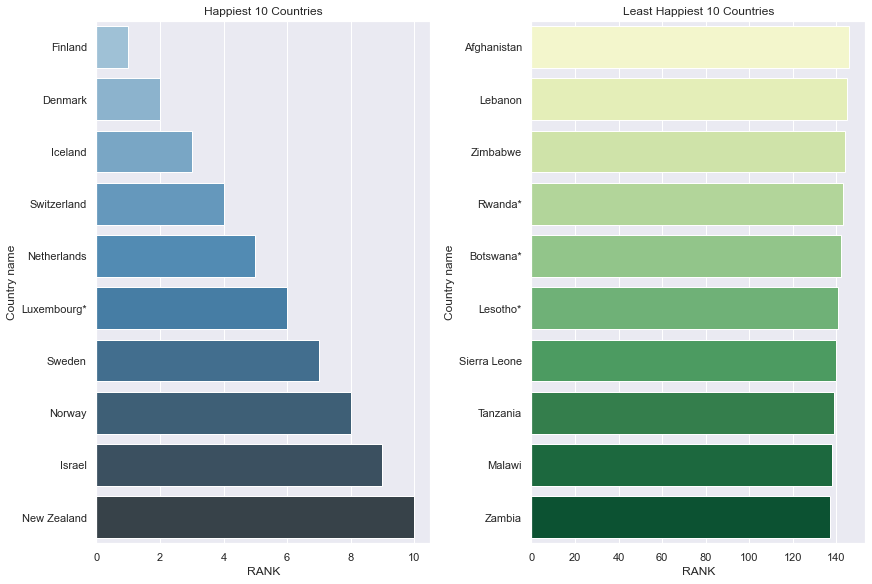

In [184]:
#now I want to display the top 10 and bottom 10 visually

#setting seaborn plotting visuals as default
sns.set()
#set how the charts should be displayed
fig, axes = plt.subplots(1, 2,constrained_layout=True,figsize=(12,8))
#then first show 10 happiest countries by using nlargest function, and adding a title
sns.barplot(x='RANK',y='Country name',data=happiest_top_10_list,ax=axes[0],palette="Blues_d").set(title = 'Happiest 10 Countries')
#then show 10 least happiest by using nsmallest function
sns.barplot(x='RANK' ,y='Country name',data=unhappiest_top_10_list,ax=axes[1],palette="YlGn").set(title = 'Least Happiest 10 Countries')


In [185]:
#Now I want to examine how Ireland ranks in each of the categories
Happiness_data_22.loc[Happiness_data_22['Country name']=='Ireland']

,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
12,13,Ireland,"7,041","7,121","6,961","1,743",2129,1166,779,627,190,408


In [190]:
#where does Ireland rank in Western Europe for each category
#create a subset of the Dataset for Western Europe only
#first we need to merge with the 2021 dataset to pick up the regional indicator
Western_Europe_21 = Happiness_data_21[(Happiness_data_21['Regional indicator'].isin(['Western Europe']))]
#Check how many countries in the category
print(len(Western_Europe.index))
Western_Europe_21

Western_Europe_21_subset = Western_Europe_21 [['Country name','Regional indicator']]
#now merge by country using inner join
Western_europe_22 = Happiness_data_22.merge(Western_Europe_21_subset, on='Country name', how='inner')
#21 countries in Western Europe category
#Add a new Ranking to the Dataset for Western Europe
#First reset the old index
Western_europe_22.reset_index(drop=True)
#Then set the index starting at 1 insteaed of 0
Western_europe_22.index = np.arange(1, len(Western_europe_22) + 1)
#Now I want to show the new Index column with a new header to rank the countries
Western_europe_22.columns.name = 'Country Ranking Western Europe'
Western_europe_22
#Ireland is number 9 in Western Europe but 13 in the world

21


Country Ranking Western Europe,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
1,1,Finland,"7,821","7,886","7,756","2,518",1892,1258,775,736,109,534,Western Europe
2,2,Denmark,"7,636","7,710","7,563","2,226",1953,1243,777,719,188,532,Western Europe
3,3,Iceland,"7,557","7,651","7,464","2,320",1936,1320,803,718,270,191,Western Europe
4,4,Switzerland,"7,512","7,586","7,437","2,153",2026,1226,822,677,147,461,Western Europe
5,5,Netherlands,"7,415","7,471","7,359","2,137",1945,1206,787,651,271,419,Western Europe
6,7,Sweden,"7,384","7,454","7,315","2,003",1920,1204,803,724,218,512,Western Europe
7,8,Norway,"7,365","7,440","7,290","1,925",1997,1239,786,728,217,474,Western Europe
8,11,Austria,"7,163","7,237","7,089","2,148",1931,1165,774,623,193,329,Western Europe
9,13,Ireland,"7,041","7,121","6,961","1,743",2129,1166,779,627,190,408,Western Europe
10,14,Germany,"7,034","7,122","6,947","2,142",1924,1088,776,585,163,358,Western Europe


In [191]:
#If we compare Ireland ranked at number 11 to Finland which is ranked at number 1, where are the differences
compare_ire_fin= Western_europe_22[(Western_europe_22['Country name'].isin(['Ireland','Finland']))]
#take only the relevant columns for comparison
compare_ire_fin_relevant_data = compare_ire_fin[['Country name','GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
compare_ire_fin_relevant_data

Country Ranking Western Europe,Country name,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
1,Finland,1892,775,1258,736,109,534
9,Ireland,2129,779,1166,627,190,408


<AxesSubplot:xlabel='Country name'>

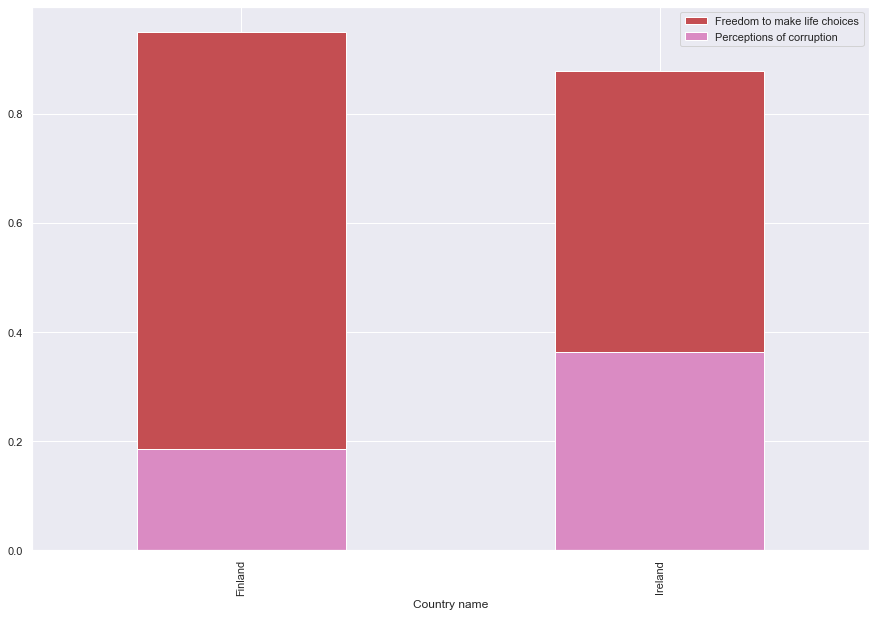

In [128]:
#lets see the two main categories which have differences between the countries
ax = compare_ire_fin.plot(y="Freedom to make life choices", x="Country name", kind="bar",stacked = True, color='C3',figsize=(15, 10))
compare_ire_fin.plot(y="Perceptions of corruption", x="Country name", kind="bar",stacked = True, ax=ax, color="C6",figsize=(15, 10))

#from graph below it is obvious that Ireland has dropped its category due to the bad ratings on these two below

[Text(0.5, 1.0, 'Happiest 10 Countries 2022')]

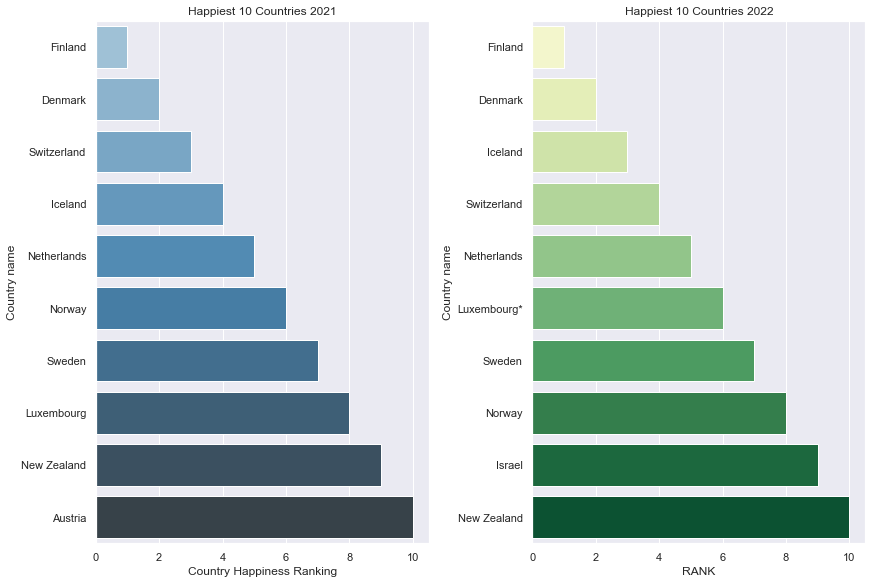

In [192]:
#Now we should compare the ranking of the top 10 countries between 2021 and 2022

# For Happiness data 2021 change Country Ranking to start with 1 instead of 0 using numpy arrange function 
Happiness_data_21.index = np.arange(1, len(Happiness_data_21) + 1)

#give the Index column a new Column to use as the country ranking as this is  now ranked 
Happiness_data_21['Country Happiness Ranking'] = Happiness_data_21.index

#let's plot the top 10 for 2022 beside the top 10 for 2021
sns.set()
#set how the charts should be displayed
fig, axes = plt.subplots(1, 2,constrained_layout=True,figsize=(12,8))
sns.barplot(x='Country Happiness Ranking',y='Country name',data=Happiness_data_21.nsmallest(10,'Country Happiness Ranking'),ax=axes[0],palette="Blues_d").set(title = 'Happiest 10 Countries 2021')
#then show 10 least happiest by using nsmallest function
sns.barplot(x='RANK' ,y='Country name',data=Happiness_data_22.nsmallest(10,'RANK'),ax=axes[1],palette="YlGn").set(title = 'Happiest 10 Countries 2022')

#we can see that Austria lost their spot in the top 10 and Israel joined the ranks at number 9 for 2022

In [17]:
#Now we need to take in another dataset to examine what other data has an influence on this report
#firstly Covid19 influence on Happiness
#reference is https://api.covid19api.com/summary

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cv19 = requests.get('https://api.covid19api.com/summary')
cv19 = cv19.json()
cv19 = pd.DataFrame(cv19['Countries'])

cv19


,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,f0fb36f9-a081-4780-a1bc-2824af23fabc,Afghanistan,AF,afghanistan,0,183285,0,7728,0,0,2022-07-14T09:19:45.566Z,{}
1,d82f7295-4f38-4772-9fa9-b44ca3e5d58c,Albania,AL,albania,0,290954,0,3517,0,0,2022-07-14T09:19:45.566Z,{}
2,79d64c04-8fe1-4194-882d-769abea12760,Algeria,DZ,algeria,0,266328,0,6875,0,0,2022-07-14T09:19:45.566Z,{}
3,543e7920-3ea2-400e-a2f5-efc8a2e56544,Andorra,AD,andorra,0,44671,0,153,0,0,2022-07-14T09:19:45.566Z,{}
4,6d331014-e173-4595-b336-9c2346558b7b,Angola,AO,angola,0,101320,0,1900,0,0,2022-07-14T09:19:45.566Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
190,1af7cfb0-1922-4596-a718-69bd5ba2a2d9,Venezuela (Bolivarian Republic),VE,venezuela,0,528785,0,5742,0,0,2022-07-14T09:19:45.566Z,{}
191,4d669ce8-eac4-4e44-a74a-93b62aee9c64,Viet Nam,VN,vietnam,0,10757257,0,43090,0,0,2022-07-14T09:19:45.566Z,{}
192,301f8806-ca20-4155-a48f-d1c4f452f307,Yemen,YE,yemen,0,11832,0,2149,0,0,2022-07-14T09:19:45.566Z,{}
193,bb59d114-6ef4-4487-845d-d5280213f065,Zambia,ZM,zambia,0,327102,0,4008,0,0,2022-07-14T09:19:45.566Z,{}


In [18]:
#clean the data from the Covid 19 dataset
cv19_shape = cv19.shape
print("Covid Number of Rows : {0} Number of Columns : {1}".format(cv19_shape[0],cv19_shape[1]))
#checking for NA values - none detected
cv19.isna().any()
#Getting the counts of NA Values - none detected
cv19.isna().sum() 

Covid Number of Rows : 195 Number of Columns : 12


ID                0
Country           0
CountryCode       0
Slug              0
NewConfirmed      0
TotalConfirmed    0
NewDeaths         0
TotalDeaths       0
NewRecovered      0
TotalRecovered    0
Date              0
Premium           0
dtype: int64

In [19]:
#we need to rename this country column to perform the join
cv19.rename(columns = {'Country':'Country name'}, inplace = True)

#we need to rename the following columns in order for them to be more descriptive
cv19.rename(columns = {'TotalConfirmed':'Total_Covid_Cases'}, inplace = True)
cv19.rename(columns = {'TotalDeaths':'Total_Covid_Deaths'}, inplace = True)

In [20]:
#check the changes have taken effect
cv19.head()

,ID,Country name,CountryCode,Slug,NewConfirmed,Total_Covid_Cases,NewDeaths,Total_Covid_Deaths,NewRecovered,TotalRecovered,Date,Premium
0,f0fb36f9-a081-4780-a1bc-2824af23fabc,Afghanistan,AF,afghanistan,0,183285,0,7728,0,0,2022-07-14T09:19:45.566Z,{}
1,d82f7295-4f38-4772-9fa9-b44ca3e5d58c,Albania,AL,albania,0,290954,0,3517,0,0,2022-07-14T09:19:45.566Z,{}
2,79d64c04-8fe1-4194-882d-769abea12760,Algeria,DZ,algeria,0,266328,0,6875,0,0,2022-07-14T09:19:45.566Z,{}
3,543e7920-3ea2-400e-a2f5-efc8a2e56544,Andorra,AD,andorra,0,44671,0,153,0,0,2022-07-14T09:19:45.566Z,{}
4,6d331014-e173-4595-b336-9c2346558b7b,Angola,AO,angola,0,101320,0,1900,0,0,2022-07-14T09:19:45.566Z,{}


In [21]:
# lets examine the Top 10 Countries per Total Confirmed Cases and see if there is a correlation between that and the 
#Lowest Happiness rating
#first we take a subset of the dataset, taking only the information we need 
cv19_subset = cv19 [['Country name', 'Total_Covid_Cases', 'Total_Covid_Deaths']]
cv19_subset.head()

,Country name,Total_Covid_Cases,Total_Covid_Deaths
0,Afghanistan,183285,7728
1,Albania,290954,3517
2,Algeria,266328,6875
3,Andorra,44671,153
4,Angola,101320,1900


In [22]:
cv19_subset.dtypes

Country name          object
Total_Covid_Cases      int64
Total_Covid_Deaths     int64
dtype: object

<AxesSubplot:xlabel='Total_Covid_Deaths', ylabel='Country name'>

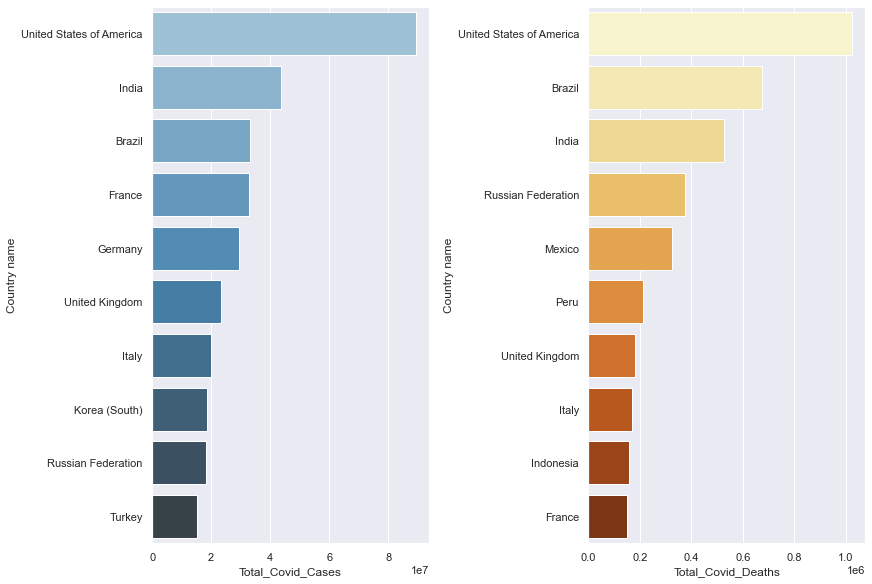

In [25]:
#Display the top 10 TotalConfirmed and Total Deaths

#first define how I want my diagrams to be shown 
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(12,8))
#then per category define what I want to show
sns.barplot(x='Total_Covid_Cases',y='Country name',data=cv19_subset.nlargest(10,'Total_Covid_Cases'),ax=axes[0],palette="Blues_d")
sns.barplot(x='Total_Covid_Deaths',y='Country name',data=cv19_subset.nlargest(10,'Total_Covid_Deaths'),ax=axes[1],palette="YlOrBr")

In [132]:
#now we want to create a new Dataframe with these countries and merge with the Happiness report 2022 using the merge function to see
#the ranking of these countries on the World Happiness Report
#first create a subset top 10 covid cases
cv19_subset_top_10_cases = cv19_subset.nlargest(10,['Total_Covid_Cases', 'Total_Covid_Deaths'])

cv19_subset_top_10_cases.reset_index()


,index,Country name,Total_Covid_Cases,Total_Covid_Deaths
0,186,United States of America,89221950,1023619
1,77,India,43689989,525557
2,24,Brazil,33076779,674482
3,60,France,32881645,151454
4,64,Germany,29460249,142284
5,185,United Kingdom,23280870,182262
6,83,Italy,19778911,169496
7,91,Korea (South),18641278,24696
8,144,Russian Federation,18202785,373983
9,181,Turkey,15297539,99088


In [133]:
#Now I want to merge the Covid 19 dataset with the Happiness data 2022
merged_data = cv19_subset_top_10_cases.merge(Happiness_data_22, on=['Country name'], how='left', indicator=True)
merged_data

,Country name,Total_Covid_Cases,Total_Covid_Deaths,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,_merge
0,United States of America,89221950,1023619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,India,43689989,525557,136.0,"3,777","3,828","3,726","0,795","1,167","0,376","0,471","0,647","0,198","0,123",both
2,Brazil,33076779,674482,38.0,"6,293","6,384","6,202","2,361","1,462","1,044","0,615","0,546","0,131","0,134",both
3,France,32881645,151454,20.0,"6,687","6,758","6,615","1,895","1,863","1,219","0,808","0,567","0,070","0,266",both
4,Germany,29460249,142284,14.0,"7,034","7,122","6,947","2,142","1,924","1,088","0,776","0,585","0,163","0,358",both
5,United Kingdom,23280870,182262,17.0,"6,943","7,018","6,867","1,967","1,867","1,143","0,750","0,597","0,289","0,329",both
6,Italy,19778911,169496,31.0,"6,467","6,570","6,363","2,222","1,834","1,052","0,801","0,412","0,085","0,059",both
7,Korea (South),18641278,24696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,Russian Federation,18202785,373983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Turkey,15297539,99088,112.0,"4,744","4,845","4,644","1,059","1,707","0,865","0,702","0,209","0,087","0,115",both


In [134]:
#upon examining the merged dataset, 3 countries could not be matched: United States of America, Korea South & Russian Federation
#therefore, we need to rename these countries based on Happiness data dataset and then remerge
#United States, Russia, South Korea
new_updated_subset = cv19_subset_top_10_cases.replace({'Country name':{'United States of America':'United States', 'Korea (South)':'South Korea', 'Russian Federation': 'Russia'}})
new_updated_subset


,Country name,Total_Covid_Cases,Total_Covid_Deaths
186,United States,89221950,1023619
77,India,43689989,525557
24,Brazil,33076779,674482
60,France,32881645,151454
64,Germany,29460249,142284
185,United Kingdom,23280870,182262
83,Italy,19778911,169496
91,South Korea,18641278,24696
144,Russia,18202785,373983
181,Turkey,15297539,99088


In [135]:
#now we can merge our datasets again
merged_data_new = new_updated_subset.merge(Happiness_data_21, on=['Country name'], how='left', indicator=True)
merged_data_new
#now it works! we have our top 10 Covid cases data and their related country happiness info.

,Country name,Total_Covid_Cases,Total_Covid_Deaths,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Happiness Ranking,_merge
0,United States,89221950,1023619,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,...,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807,19,both
1,India,43689989,525557,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,...,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405,139,both
2,Brazil,33076779,674482,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,...,2.43,1.028,0.944,0.571,0.514,0.142,0.117,3.015,35,both
3,France,32881645,151454,Western Europe,6.690,0.037,6.762,6.618,10.704,0.942,...,2.43,1.421,1.081,0.804,0.536,0.092,0.235,2.521,21,both
4,Germany,29460249,142284,Western Europe,7.155,0.040,7.232,7.077,10.873,0.903,...,2.43,1.480,0.993,0.757,0.600,0.195,0.306,2.824,13,both
5,United Kingdom,23280870,182262,Western Europe,7.064,0.038,7.138,6.990,10.707,0.934,...,2.43,1.423,1.062,0.757,0.580,0.340,0.306,2.596,17,both
6,Italy,19778911,169496,Western Europe,6.483,0.045,6.572,6.395,10.623,0.880,...,2.43,1.393,0.940,0.798,0.379,0.133,0.047,2.794,28,both
7,South Korea,18641278,24696,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,...,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262,62,both
8,Russia,18202785,373983,Commonwealth of Independent States,5.477,0.033,5.541,5.413,10.189,0.903,...,2.43,1.241,0.992,0.511,0.409,0.115,0.060,2.148,76,both
9,Turkey,15297539,99088,Middle East and North Africa,4.948,0.046,5.038,4.857,10.240,0.822,...,2.43,1.260,0.809,0.590,0.236,0.097,0.104,1.852,104,both


In [136]:
# now we want to check which ranking these countries had in the Happiness Report and if there is a correlation there
#first we must reset the index to start at 1 in order to create a ranking and then create a new column to store the ranking

merged_data_new.index = np.arange(1, len(merged_data_new) + 1)

#give the Index column a new Column to use as the country ranking as this is  now ranked 
merged_data_new['Covid Cases Ranking'] = merged_data_new.index
merged_data_new

,Country name,Total_Covid_Cases,Total_Covid_Deaths,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Happiness Ranking,_merge,Covid Cases Ranking
1,United States,89221950,1023619,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,...,1.533,1.030,0.621,0.554,0.252,0.154,2.807,19,both,1
2,India,43689989,525557,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,...,0.741,0.316,0.383,0.622,0.246,0.106,1.405,139,both,2
3,Brazil,33076779,674482,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,...,1.028,0.944,0.571,0.514,0.142,0.117,3.015,35,both,3
4,France,32881645,151454,Western Europe,6.690,0.037,6.762,6.618,10.704,0.942,...,1.421,1.081,0.804,0.536,0.092,0.235,2.521,21,both,4
5,Germany,29460249,142284,Western Europe,7.155,0.040,7.232,7.077,10.873,0.903,...,1.480,0.993,0.757,0.600,0.195,0.306,2.824,13,both,5
6,United Kingdom,23280870,182262,Western Europe,7.064,0.038,7.138,6.990,10.707,0.934,...,1.423,1.062,0.757,0.580,0.340,0.306,2.596,17,both,6
7,Italy,19778911,169496,Western Europe,6.483,0.045,6.572,6.395,10.623,0.880,...,1.393,0.940,0.798,0.379,0.133,0.047,2.794,28,both,7
8,South Korea,18641278,24696,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,...,1.403,0.758,0.801,0.353,0.134,0.135,2.262,62,both,8
9,Russia,18202785,373983,Commonwealth of Independent States,5.477,0.033,5.541,5.413,10.189,0.903,...,1.241,0.992,0.511,0.409,0.115,0.060,2.148,76,both,9
10,Turkey,15297539,99088,Middle East and North Africa,4.948,0.046,5.038,4.857,10.240,0.822,...,1.260,0.809,0.590,0.236,0.097,0.104,1.852,104,both,10


In [137]:
#now we have both rankings, we want to visualise the data, in tabular format by taking a subset

merged_data_covid_happiness = merged_data_new [['Country name', 'Covid Cases Ranking', 'Country Happiness Ranking'] ]
merged_data_covid_happiness


,Country name,Covid Cases Ranking,Country Happiness Ranking
1,United States,1,19
2,India,2,139
3,Brazil,3,35
4,France,4,21
5,Germany,5,13
6,United Kingdom,6,17
7,Italy,7,28
8,South Korea,8,62
9,Russia,9,76
10,Turkey,10,104


In [35]:
#however, we now have a ranking of just the number of Covid Cases per country, but this does not tell us the clear picture of the 
#percentage of cases per population so we need to import a population dataset and then calculate the percentage

#population dataset https://www.kaggle.com/datasets/anandhuh/countries-in-the-world-by-population-2022

#importing required datasets
world_population_2022 =pd.read_csv('population_by_country_2022.csv')

#take a look at the first few rows of the dataset
world_population_2022.head()


,Country name,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [88]:
#now we need to make a subset of the data for our analysis purposes - we just need the Country and it's population
world_pop_per_country_22 = world_population_2022 [['Country name', 'Population (2020)']]

world_pop_per_country_22.head()


,Country name,Population (2020)
0,Afghanistan,38928346
1,Albania,2877797
2,Algeria,43851044
3,Angola,32866272
4,Antigua and Barbuda,97929


In [138]:
#clean the data
shape = world_pop_per_country_22.shape
print("Population Number of Rows : {0} Number of Columns : {1}".format(shape[0],shape[1]))


#checking for NA values - none detected
world_pop_per_country_22.isna().any()
#Getting the counts of NA Values - none detected
world_pop_per_country_22.isna().sum() 


Population Number of Rows : 201 Number of Columns : 2


Country name         0
Population (2020)    0
dtype: int64

In [38]:
#make a copy of the original file
original_pop_file=world_pop_per_country_22.copy()

#now we need to merge the population file with our dataset above containing the covid info
merged_data_new_pop = cv19_subset.merge(world_pop_per_country_22, on=['Country name'], how='left', indicator=False)
merged_data_new_pop


,Country name,Total_Covid_Cases,Total_Covid_Deaths,Population (2020)
0,Afghanistan,183285,7728,38928346.0
1,Albania,290954,3517,2877797.0
2,Algeria,266328,6875,43851044.0
3,Andorra,44671,153,NaN
4,Angola,101320,1900,32866272.0
...,...,...,...,...
190,Venezuela (Bolivarian Republic),528785,5742,NaN
191,Viet Nam,10757257,43090,NaN
192,Yemen,11832,2149,29825964.0
193,Zambia,327102,4008,18383955.0


In [139]:
#now we need to add two columns to calculate percentage of cases and deaths per population
#first we must rename the column Population (2020) due to the space in the name
merged_data_new_pop.rename(columns = {'Population (2020)':'Population'}, inplace = True)
#Now perform the calculation and add the two new columns
merged_data_new_pop['%_Cases_per_Country'] = (merged_data_new_pop.Total_Covid_Cases/merged_data_new_pop.Population)*100
merged_data_new_pop['%_Deaths_per_Country'] = (merged_data_new_pop.Total_Covid_Deaths/merged_data_new_pop.Population)*100

#now we want to take subsets of the dataset - the top 10 % Cases and Deaths per country using the nlargest function
merged_data_new_pop_top_10 = merged_data_new_pop.nlargest(10, ['%_Cases_per_Country', '%_Deaths_per_Country'])
merged_data_new_pop_top_10


,Country name,Total_Covid_Cases,Total_Covid_Deaths,Population,%_Cases_per_Country,%_Deaths_per_Country
76,Iceland,198721,179,341243.0,58.234455,0.052455
47,Denmark,3245928,6579,5792202.0,56.039620,0.113584
82,Israel,4482086,11101,8655535.0,51.782888,0.128253
140,Portugal,5273845,24369,10196709.0,51.721050,0.238989
10,Austria,4591009,20152,9006398.0,50.974974,0.223752
159,Slovenia,1054441,6662,2078938.0,50.720175,0.320452
60,France,32881645,151454,65273511.0,50.375174,0.232030
124,Netherlands,8260556,22413,17134872.0,48.209032,0.130803
158,Slovakia,2560261,20166,5459642.0,46.894302,0.369365
155,Seychelles,45076,167,98347.0,45.833630,0.169807


In [143]:
#reset index to create a ranking column
merged_data_new_pop_top_10.reset_index(drop=True)
#Then set the index starting at 1 insteaed of 0
merged_data_new_pop_top_10.index = np.arange(1, len(merged_data_new_pop_top_10) + 1)
merged_data_new_pop_top_10['Covid_Ranking'] = merged_data_new_pop_top_10.index
merged_data_new_pop_top_10

,Country name,Total_Covid_Cases,Total_Covid_Deaths,Population,%_Cases_per_Country,%_Deaths_per_Country,Covid_Ranking
1,Iceland,198721,179,341243.0,58.234455,0.052455,1
2,Denmark,3245928,6579,5792202.0,56.039620,0.113584,2
3,Israel,4482086,11101,8655535.0,51.782888,0.128253,3
4,Portugal,5273845,24369,10196709.0,51.721050,0.238989,4
5,Austria,4591009,20152,9006398.0,50.974974,0.223752,5
6,Slovenia,1054441,6662,2078938.0,50.720175,0.320452,6
7,France,32881645,151454,65273511.0,50.375174,0.232030,7
8,Netherlands,8260556,22413,17134872.0,48.209032,0.130803,8
9,Slovakia,2560261,20166,5459642.0,46.894302,0.369365,9
10,Seychelles,45076,167,98347.0,45.833630,0.169807,10


In [149]:
#now we can merge the data again with our Happiness Data to see how the results change with the percentage calculation
merged_covid_pop_happiness = merged_data_new_pop_top_10.merge(Happiness_data_22, on=['Country name'], how='left', indicator=True)
merged_covid_pop_happiness
merged_covid_pop_happiness.rename(columns={'RANK': 'Country Happiness Ranking'}, inplace=True)
merged_covid_pop_happiness_show = merged_covid_pop_happiness[['Country name', 'Covid_Ranking', 'Country Happiness Ranking']]
merged_covid_pop_happiness_show

,Country name,Covid_Ranking,Country Happiness Ranking
0,Iceland,1,3.0
1,Denmark,2,2.0
2,Israel,3,9.0
3,Portugal,4,56.0
4,Austria,5,11.0
5,Slovenia,6,22.0
6,France,7,20.0
7,Netherlands,8,5.0
8,Slovakia,9,35.0
9,Seychelles,10,NaN


In [150]:
#defining a function to highlight the rows in the new dataset to show which countries could have had their Happiness impacted by
#covid factors

def highlight_rows(i):
    list_rows = i.copy()
    list_rows[:] = None
    if (i['Country Happiness Ranking'] > 20):
        list_rows[:] = "background-color: red"
    elif (i['Country Happiness Ranking'] <= 20 ):
        list_rows[:] = "background-color: green"
    return list_rows
        
merged_covid_pop_happiness_show.style.apply(highlight_rows, axis=1).hide_index()

#As we can see from the diagram below, there are 3 countries which have been heavily impacted by both Covid Deaths and Cases
#and which also have not high Happiness Rankings.
#This is based on Assumption that Covid could have impacted this survey. Seychelles did not participate in the Happiness Report

Country name,Covid_Ranking,Country Happiness Ranking
Iceland,1,3.000000
Denmark,2,2.000000
Israel,3,9.000000
Portugal,4,56.000000
Austria,5,11.000000
Slovenia,6,22.000000
France,7,20.000000
Netherlands,8,5.000000
Slovakia,9,35.000000
Seychelles,10,nan


In [43]:
#As the next step, I want to take a different dataset and analyse the potential impact on Happiness
#Now we take a Work Life Balance ranking survey and merge it with our Happiness report to see if there is a correlation 
# https://www.kaggle.com/datasets/prasertk/cities-with-the-best-worklife-balance-2022

Work_life_balance =pd.read_csv('Cities with the Best Work-Life Balance 2022.csv')

#take a look at the first few rows of the dataset
Work_life_balance.head()


,2022,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [44]:
#clean the data
shape = Work_life_balance.shape

#make a copy of the original file
original_wlb=Work_life_balance.copy()

#checking for NA values - none detected
Work_life_balance.isna().any()

#Getting the counts of NA Values - none detected
Work_life_balance.isna().sum() 


2022                                0
2021                                0
City                                0
Country                             0
Remote Jobs                         0
Overworked Population               0
Minimum Vacations Offered (Days)    0
Vacations Taken (Days)              0
Unemployment                        0
Multiple Jobholders                 0
Inflation                           0
Paid Parental Leave (Days)          0
Covid Impact                        0
Covid Support                       0
Healthcare                          0
Access to Mental Healthcare         0
Inclusivity & Tolerance             0
Affordability                       0
Happiness, Culture & Leisure        0
City Safety                         0
Outdoor Spaces                      0
Air Quality                         0
Wellness and Fitness                0
TOTAL SCORE                         0
dtype: int64

In [45]:
#now we need to take a Work Life Balance score for each country and city and create a new dataset with this

subset_work_life_balance = Work_life_balance[['Country', 'City', '2022' ]]
subset_work_life_balance.describe()
subset_work_life_balance.dtypes

subset_work_life_balance


,Country,City,2022
0,Norway,Oslo,1
1,Switzerland,Bern,2
2,Finland,Helsinki,3
3,Switzerland,Zurich,4
4,Denmark,Copenhagen,5
...,...,...,...
95,Thailand,Bangkok,96
96,Brazil,Sao Paulo,97
97,Malaysia,Kuala Lumpur,98
98,UAE,Dubai,99


In [153]:
#merge the work life balance dataset with the Happiness dataset and check the top 10 of each 
#to see if there is any correlation between the datasets
#first rename Column Country to Country name
#also rename 2022 column to Work life Balance 22
subset_work_life_balance.rename(columns = {'Country':'Country name'}, inplace = True)
subset_work_life_balance.rename(columns = {'2022':'Work Life Balance 22'}, inplace = True)
subset_work_life_balance
Dataset_happiness_balance = pd.merge(Happiness_data_22,
              subset_work_life_balance[['Country name', 'City', 'Work Life Balance 22']],
             on='Country name', 
            how='left')
Dataset_happiness_balance

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,City,Work Life Balance 22
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",Helsinki,3.0
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",Copenhagen,5.0
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",NaN,NaN
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",Bern,2.0
4,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",Zurich,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544",NaN,NaN
159,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105",NaN,NaN
160,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034",NaN,NaN
161,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005",NaN,NaN


In [154]:
#show the Top countries in the Happiness report with the corresponding Work life Balance scores

Happiest_countries = Dataset_happiness_balance.sort_values('RANK', ascending=True)[:20]
happiest_countries_2 = Happiest_countries [['Country name', 'City', 'Work Life Balance 22' ]]
happiest_countries_2.reset_index(drop = True)
happiest_countries_2.index = np.arange(1, len(happiest_countries_2) + 1)
happiest_countries_2

,Country name,City,Work Life Balance 22
1,Finland,Helsinki,3.0
2,Denmark,Copenhagen,5.0
3,Iceland,NaN,NaN
4,Switzerland,Bern,2.0
5,Switzerland,Zurich,4.0
6,Switzerland,Geneva,6.0
7,Netherlands,Amsterdam,13.0
8,Luxembourg*,NaN,NaN
9,Sweden,Stockholm,11.0
10,Norway,Oslo,1.0


In [49]:
# As we can see, Iceland, Luxembourg and Israel did not participate in the Work Life Balance survey
# Switzerland ranked high in both surveys - a correlation between the surveys
#In Germany there was a high correlation between the rankings in both surveys
#Looking at Norway, Oslo ranked number 1 in Work Life Balance but 7 in the Happiness, therefore other factors are contributing to the lower happiness score

#Now we can look at it from the other view - taking the top Work Life Balance Scores and see the correlation 

Balanced_cities = Dataset_happiness_balance.sort_values('Work Life Balance 22', ascending=True)[:20]
balanced_cities_2 = Balanced_cities [['Country name', 'City', 'Work Life Balance 22' ]]
balanced_cities_2


,Country name,City,Work Life Balance 22
7,Norway,Oslo,1.0
2,Switzerland,Bern,2.0
0,Finland,Helsinki,3.0
3,Switzerland,Zurich,4.0
1,Denmark,Copenhagen,5.0
4,Switzerland,Geneva,6.0
25,Canada,Ottawa,7.0
13,Australia,Sydney,8.0
16,Germany,Stuttgart,9.0
17,Germany,Munich,10.0


[Text(0.5, 1.0, 'Ranking: Most Balanced 20 Cities/Countries')]

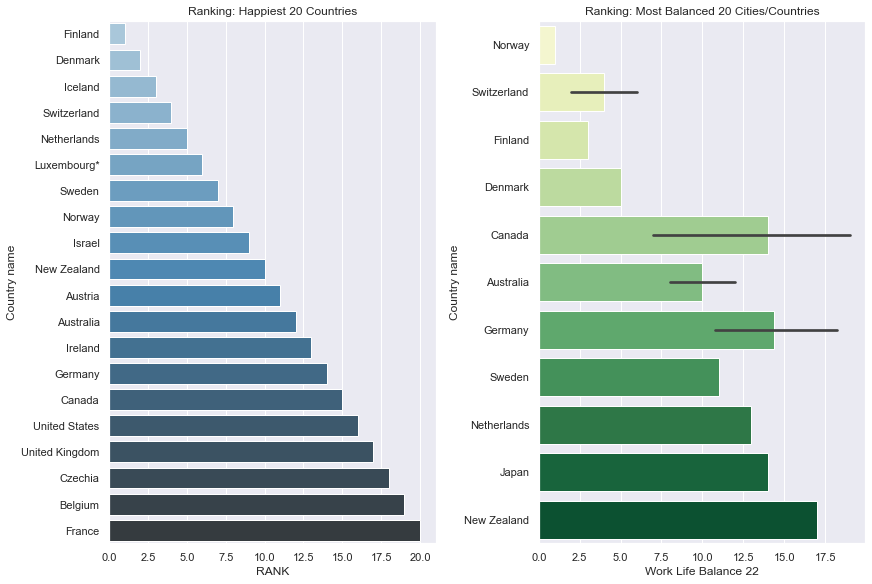

In [157]:
#lets plot both results beside each other per Country and see the correlations
sns.set()
#set how the charts should be displayed
fig, axes = plt.subplots(1, 2,constrained_layout=True,figsize=(12,8))
#then first show 20 happiest countries by using nlargest function, and adding a title
sns.barplot(x='RANK',y='Country name',data=Happiness_data_22.nsmallest(20,'RANK'),ax=axes[0],palette="Blues_d").set(title = 'Ranking: Happiest 20 Countries')
#then show 20 most balanced by using nlargest function
sns.barplot(x='Work Life Balance 22' ,y='Country name',data=balanced_cities_2.nsmallest(20,'Work Life Balance 22'),ax=axes[1],palette="YlGn").set(title = 'Ranking: Most Balanced 20 Cities/Countries')
#As we can see from the results,all countries from the Most Balanced rankings correlate to the Happiest Countries except for Japan 

In [158]:
#lets check the impact of working from home for these top countries
subset_work_life_balance_wfh = Work_life_balance [['Country', 'City', 'Remote Jobs']]
subset_work_life_balance_wfh.reset_index(drop = True)
subset_work_life_balance_wfh.index = np.arange(1, len(subset_work_life_balance_wfh) + 1)
subset_work_life_balance_wfh

,Country,City,Remote Jobs
1,Norway,Oslo,41.72%
2,Switzerland,Bern,44.86%
3,Finland,Helsinki,38.92%
4,Switzerland,Zurich,44.86%
5,Denmark,Copenhagen,41.42%
...,...,...,...
96,Thailand,Bangkok,16.84%
97,Brazil,Sao Paulo,25.65%
98,Malaysia,Kuala Lumpur,30.70%
99,UAE,Dubai,28.89%


In [164]:
#let's show the working from home percentages on a table per country

#first we have to convert the percentages to floats from strings by first stripping the % sign 
#subset_work_life_balance_wfh['Remote Jobs'] = subset_work_life_balance_wfh['Remote Jobs'].str.rstrip('%').astype(float)/100.0
subset_work_life_balance_wfh_top_40_cities = subset_work_life_balance_wfh.sort_values('Remote Jobs', ascending=False)[:40]
Subset_new_wfh = subset_work_life_balance_wfh_top_40_cities.groupby(['Country'])['Remote Jobs'].median().reset_index()
Subset_new_wfh = Subset_new_wfh.sort_values('Remote Jobs', ascending = False)[:20]
Subset_new_wfh
#now we have top 10 countries with working from home highest results

,Country,Remote Jobs
6,Singapore,0.5206
8,Switzerland,0.4486
7,Sweden,0.4420
9,UK,0.4350
0,Belgium,0.4234
5,Norway,0.4172
4,Netherlands,0.4155
1,Denmark,0.4142
10,USA,0.4114
3,Hong Kong,0.4027


In [165]:
#lets add a ranking to this
#reset the index to start at 1
Subset_new_wfh.reset_index(drop = True)
Subset_new_wfh.index = np.arange(1, len(Subset_new_wfh) + 1)
Subset_new_wfh['Wfh_ranking'] = Subset_new_wfh.index
#ddd a ranking as a copy of the first index
Subset_new_wfh


,Country,Remote Jobs,Wfh_ranking
1,Singapore,0.5206,1
2,Switzerland,0.4486,2
3,Sweden,0.4420,3
4,UK,0.4350,4
5,Belgium,0.4234,5
6,Norway,0.4172,6
7,Netherlands,0.4155,7
8,Denmark,0.4142,8
9,USA,0.4114,9
10,Hong Kong,0.4027,10


In [91]:
#now lets merge with the dataset above to see how the overall work life balance rankings match with the wfh rankings
balanced_cities_2

,Country name,City,Work Life Balance 22
7,Norway,Oslo,1.0
2,Switzerland,Bern,2.0
0,Finland,Helsinki,3.0
3,Switzerland,Zurich,4.0
1,Denmark,Copenhagen,5.0
4,Switzerland,Geneva,6.0
25,Canada,Ottawa,7.0
13,Australia,Sydney,8.0
16,Germany,Stuttgart,9.0
17,Germany,Munich,10.0


In [193]:
Subset_new_wfh.rename(columns = {'Country':'Country name'}, inplace = True)
#merging the top 11 workng from home countries with the top 20 cities for general Work Life Balance
Dataset_wfh_balance = pd.merge(Subset_new_wfh,
              balanced_cities_2[['Country name', 'City', 'Work Life Balance 22']],
             on='Country name', 
            how='left')
Dataset_wfh_balance


,Country name,Remote Jobs,Wfh_ranking,City,Work Life Balance 22
0,Singapore,0.5206,1,NaN,NaN
1,Switzerland,0.4486,2,Bern,2.0
2,Switzerland,0.4486,2,Zurich,4.0
3,Switzerland,0.4486,2,Geneva,6.0
4,Sweden,0.4420,3,Stockholm,11.0
5,UK,0.4350,4,NaN,NaN
6,Belgium,0.4234,5,NaN,NaN
7,Norway,0.4172,6,Oslo,1.0
8,Netherlands,0.4155,7,Amsterdam,13.0
9,Denmark,0.4142,8,Copenhagen,5.0


In [97]:
#we need to replace the NaN data with a reason for this: which is that these countries did not make it into the top 20 in the Work Life Balance report

Dataset_wfh_balance[['Work Life Balance 22']] = Dataset_wfh_balance[['Work Life Balance 22']].fillna('Not Ranked in Top 20 Work Life Balance')
Dataset_wfh_balance[['City']] = Dataset_wfh_balance[['City']].fillna('-')

Dataset_wfh_balance

# we can derive from this output that wfh is not the main factor when we consider that 5 cities in the top wfh ranking have not been
#ranked in the top 20 work life balance survey

,Country name,Remote Jobs,Wfh_ranking,City,Work Life Balance 22
0,Belgium,0.4234,1,-,Not Ranked in Top 20 Work Life Balance
1,Denmark,0.4142,2,Copenhagen,5.0
2,Finland,0.3892,3,Helsinki,3.0
3,Hong Kong,0.4027,4,-,Not Ranked in Top 20 Work Life Balance
4,Netherlands,0.4155,5,Amsterdam,13.0
5,Norway,0.4172,6,Oslo,1.0
6,Singapore,0.5206,7,-,Not Ranked in Top 20 Work Life Balance
7,Sweden,0.4420,8,Stockholm,11.0
8,Switzerland,0.4486,9,Bern,2.0
9,Switzerland,0.4486,9,Zurich,4.0
